<a href="https://colab.research.google.com/github/7sr7/Intro-to-AI-HW2/blob/main/Silvestre_Intro_to_AI_HW_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1: KNN

# HW2: K-Nearest Neighbors Classification (25 points)

This notebook will guide you through:

- Preparing and exploring the MNIST dataset
- Computing simple features
- Implementing a KNN classifier from scratch
- Evaluating and analyzing your results


In [8]:
import numpy as np
import pandas as pd
import collections
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import os
import sys
import warnings
# Ignore all user warnings (including NumPy/SciPy compatibility)
warnings.filterwarnings("ignore", category=UserWarning)
# Load Data
try:
  data = np.load("mnist_10k_trainval.npz")
except:
  # i am using google colab to complete this assignment

  # mounting to google drive...
  from google.colab import drive
  drive.mount('/content/drive')

  data = np.load("/content/drive/MyDrive/mnist_10k_trainval.npz")

x_all = data["x"]
y_all = data["y"]

print("Images shape:", x_all.shape)
print("Labels shape:", y_all.shape)
print("Label classes:", np.unique(y_all))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Images shape: (10000, 28, 28)
Labels shape: (10000,)
Label classes: [0 1 2 3 4 5 6 7 8 9]


---
**Note:** Decide your own train/validation/testing split here. You must clearly document it.


In [53]:
# TODO: Decide your split strategy here
# Example: use the first 1000 for training, next 1000 for validation
# You must document your choice.


# we have a test set already, so we dont need to use this 10k dataset to split with
# the test set in mind...

# i would like to give "ample" data observation for the purpose of training
# therefore, i am going with a 90 10 split for training and validation...

# training split...
x_train = x_all[:9000]
y_train = y_all[:9000]

# validation split...
x_val = x_all[9000:]
y_val = y_all[9000:]

---
## Preprocessing the Data
Conduct any data manipulation you require to obtain the features dataframe (df_features in HW2_Starter).
You must showcase at least 3 features for each image. You can add additional features if you wish.



In [3]:
# # TODO: Preprocess the data and create your features DataFrame
# # You must compute at least 3 features per image and combine them with the labels.


# # preprocessing -- flattening image data and normalizing pixels...
# # Flatten: (28,28) -> (784,)
# x_train_flat = x_train.reshape(len(x_train), -1)
# x_val_flat = x_val.reshape(len(x_val), -1)

# # Normalize to [0,1]
# x_train_norm = x_train_flat / 255.0
# x_val_norm = x_val_flat / 255.0


# # feature extraction...
# # Count of pixels > 0.5
# threshold_counts = (x_train_flat > 0.5).sum(axis=1)

# # Mean pixel intensity per image
# mean_intensity = x_train_flat.mean(axis=1)

# # Standard deviation of pixel intensity per image
# std_intensity = x_train_flat.std(axis=1)

# # count of how many nonzero pixels there are
# nonzero_counts = (x_train_flat > 0).sum(axis=1)

# # creating features DataFrame...
# df_features = pd.DataFrame({
#   "record_id": np.arange(len(x_train)),
#   # "img_data": x_train_norm,
#   "mean_intensity": mean_intensity,
#   "std_intensity": std_intensity,
#   "threshold_count": threshold_counts,
#   "nonzero_count": nonzero_counts,
#   "label": y_train
# })

# df_features.head(5)

,record_id,mean_intensity,std_intensity,threshold_count,nonzero_count,label
0,0,58.743622,98.097954,250,250,8
1,1,35.834184,81.001641,157,157,4
2,2,34.992347,78.202200,171,171,8
3,3,25.327806,70.768745,111,111,7
4,4,31.229592,77.376487,134,134,7


In [139]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

x_train_flat = x_train.reshape(len(x_train), -1)
x_val_flat = x_val.reshape(len(x_val), -1)


# Normalize to [0,1]
x_train_norm = x_train_flat / 255.0
x_val_norm = x_val_flat / 255.0





knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_norm, y_train)
y_pred = knn.predict(x_val_norm)
print("Sklearn accuracy:", accuracy_score(y_val, y_pred))

Sklearn accuracy: 0.941


In [141]:
# Example function stub, feel free to edit it in any shape or form outside of the function name
def knn_predictor(x_train, y_train, x_test, k):
  # x_train = np.array(x_train)
  # y_train = np.array(y_train)
  # x_test = np.array(x_test)

  # x_trainVals = x_train.values
  # y_trainVals = y_train.values
  # x_testVals = x_test.values

  # x_trainVals = x_train.to_numpy()
  # x_testVals = x_test.to_numpy()


  # print(x_trainVals)
  # sys.exit(1)

  print("here")
  #Implement KNN here

  allPredictions = []

  for i in x_test:
    distances = []

    # Compute Euclidean distances to all training points
    # distances = np.linalg.norm(x_test - i, axis=1)
    distances = np.linalg.norm(i - x_train, axis=1)  # for each val point x_val


    # distances = np.sqrt(  ((x_test - i) ** 2).sum(axis=1))

    # distances = np.sqrt(((x_test[:, np.newaxis, :] - x_train[np.newaxis, :, :]) ** 2).sum(axis=2))

    # Get indices of k nearest neighbors
    neighInd = np.argsort(distances)[:k]

    # Get their labels
    neighLabels = y_train[neighInd]

    # Majority vote
    allLabels = {}
    maxCandidates = []

    if False:
      majorityLabel = -1
      majorityCount = -1

      for label in neighLabels:
        if (label in allLabels):
          allLabels[label] += 1
        else:
          allLabels[label] = 1

          if (allLabels[label] > majorityCount):
            majorityCount = allLabels[label]
            majorityLabel = label

      # for breaking ties...
      for label, count in allLabels.items():
        if (count == majorityCount):
          maxCandidates.append(label)

      if (len(maxCandidates) > 1):
        majorityLabel = min(maxCandidates)

    else:
      most_common = collections.Counter(neighLabels).most_common(1)[0][0]

      # most_common_label = allLabels.most_common(1)[0][0]
      majorityLabel = most_common

    allPredictions.append(majorityLabel)

  #Compute Distances, determine nearest neighbors, vote for class of sample
  return np.array(allPredictions)


In [142]:
# TODO: Evaluate accuracy for different k values

kVals = [2 * i + 1 for i in range(5)]
# print(kVals)

# sys.exit(1)

accuracies = {} # Store your accuracies in a dictionary so you can easily compare them later.
# numCorrect = 0
# total = 0

# print(x_train_norm.shape)
# print(x_val_norm.shape)

# print(y_train.shape)
# sys.exit(1)



# print(df_featuresTrainNorm.head())
# print(df_featuresValNorm.head())

# print(df_featuresVal.shape)

# x_train = np.array(df_featuresTrain)
# print(x_train.shape)

for k in kVals:
#   print("here...")
  # returns array of all predicted classifications, where the "test" point is each validation pt...

  # preds = knn_predictor(x_train_norm[:1000], y_train[:1000], x_val_norm[:1000], k)
  preds = knn_predictor(x_train_norm[:1000], y_train[:1000], x_val_norm[:1000], k)

#   preds = knn_predictor(df_featuresTrain, y_train, df_featuresVal, k)
  correct = (preds == y_val[:1000])
  accuracy = np.mean(correct)
  accuracies[k] = accuracy

#   # print(correct)
  print(f"k = {k}, accuracy = {accuracy:.4f}")


here
k = 1, accuracy = 0.8840
here
k = 3, accuracy = 0.8860
here
k = 5, accuracy = 0.8880
here
k = 7, accuracy = 0.8840
here
k = 9, accuracy = 0.8750


In [133]:
# TODO: Preprocess the data and create your features DataFrame
# You must compute at least 3 features per image and combine them with the labels.


# preprocessing -- flattening image data and normalizing pixels...
# Flatten: (28,28) -> (784,)
x_train_flat = x_train.reshape(len(x_train), -1)
x_val_flat = x_val.reshape(len(x_val), -1)





# Normalize to [0,1]
x_train_norm = x_train_flat / 255.0
x_val_norm = x_val_flat / 255.0






# feature extraction...
# Count of pixels > 0.5
threshold_countsTrain = (x_train_flat > 0.5).sum(axis=1)
threshold_countsVal = (x_val_flat > 0.5).sum(axis=1)

# Mean pixel intensity per image
mean_intensityTrain = x_train_flat.mean(axis=1)
mean_intensityVal = x_val_flat.mean(axis=1)

# Standard deviation of pixel intensity per image
std_intensityTrain = x_train_flat.std(axis=1)
std_intensityVal = x_val_flat.std(axis=1)

# count of how many nonzero pixels there are
nonzero_countsTrain = (x_train_flat > 0).sum(axis=1)
nonzero_countsVal = (x_val_flat > 0).sum(axis=1)

# getting number of pixels in each of the 4 quadrants...
# top_left = img[:14, :14].sum()
# top_right = img[:14, 14:].sum()
# bottom_left = img[14:, :14].sum()
# bottom_right = img[14:, 14:].sum()


print(x_train.shape)
def extract_quadrant_features(images):  # shape: (N, 28, 28)
    features = []
    for img in images:
        q1 = img[:14, :14].sum()
        q2 = img[:14, 14:].sum()
        q3 = img[14:, :14].sum()
        q4 = img[14:, 14:].sum()
        features.append([q1, q2, q3, q4])
    return np.array(features)  # shape: (N, 4)

allQuadsTrain = extract_quadrant_features(x_train)
allQuadsVal = extract_quadrant_features(x_val)


from scipy.ndimage import center_of_mass

# img must be shape (28, 28)
def getCOM(imgs):
  features = []

  for img in imgs:
    com_y, com_x = center_of_mass(img)  # returns (row, col) = (y, x)
    features.append([com_y, com_x])

  return np.array(features)  # shape: (N, 2)

allCOMTrain = getCOM(x_train)
allCOMVal = getCOM(x_val)


def getImgSymmetry(imgs):
  features = []

  for img in imgs:
    if False:
      top = img[:14, :]
      bottom = np.flipud(img[14:, :])
      horiz_symmetry = -np.abs(top - bottom).sum()  # lower = more symmetric


      left = img[:, :14]
      right = np.fliplr(img[:, 14:])
      vert_symmetry = -np.abs(left - right).sum()

    else:
      top = img[:14, :].astype(np.int16)
      bottom = np.flipud(img[14:, :]).astype(np.int16)
      horiz_symmetry = -np.abs(top - bottom).sum()

      left = img[:, :14].astype(np.int16)
      right = np.fliplr(img[:, 14:]).astype(np.int16)
      vert_symmetry = -np.abs(left - right).sum()


    features.append([horiz_symmetry, vert_symmetry])

  return np.array(features)  # shape: (N, 2)

allSymmetryTrain = getImgSymmetry(x_train)
allSymmetryVal = getImgSymmetry(x_val)

# print(allCOMTrain)
# print(allCOMVal)
# sys.exit(1)

# print(allQuads)


def getImgIntensity(imgs):
  features = []
  for img in imgs:
    row_profile = img.sum(axis=1)   # vertical scan
    col_profile = img.sum(axis=0)   # horizontal scan

    features.append([row_profile.mean(), col_profile.mean()])

  return np.array(features)  # shape: (N, 2)


allIntensityTrain = getImgIntensity(x_train)
allIntensityVal = getImgIntensity(x_val)

# creating features DataFrame...
df_featuresTrain = pd.DataFrame({
  # "record_id": np.arange(len(x_train)),
  # "img_data": x_train_norm,
  "mean_intensity": mean_intensityTrain,
  "std_intensity": std_intensityTrain,
  "threshold_count": threshold_countsTrain,
  "nonzero_count": nonzero_countsTrain,
  "q1": allQuadsTrain[:, 0],
  "q2": allQuadsTrain[:, 1],
  "q3": allQuadsTrain[:, 2],
  "q4": allQuadsTrain[:, 3],
  "com_y": allCOMTrain[:, 0],
  "com_x": allCOMTrain[:, 1],
  "symmetry_h": allSymmetryTrain[:, 0],
  "symmetry_v": allSymmetryTrain[:, 1],
  "rowIntensity": allIntensityTrain[:, 0],
  "colIntensity": allIntensityTrain[:, 1],
})


df_featuresVal = pd.DataFrame({
  "mean_intensity": mean_intensityVal,
  "std_intensity": std_intensityVal,
  "threshold_count": threshold_countsVal,
  "nonzero_count": nonzero_countsVal,
  "q1": allQuadsVal[:, 0],
  "q2": allQuadsVal[:, 1],
  "q3": allQuadsVal[:, 2],
  "q4": allQuadsVal[:, 3],
  "com_y": allCOMVal[:, 0],
  "com_x": allCOMVal[:, 1],
  "symmetry_h": allSymmetryVal[:, 0],
  "symmetry_v": allSymmetryVal[:, 1],
  "rowIntensity": allIntensityVal[:, 0],
  "colIntensity": allIntensityVal[:, 1],
})


print(df_featuresTrain.head(5))

(9000, 28, 28)
   mean_intensity  std_intensity  threshold_count  nonzero_count    q1     q2  \
0       58.743622      98.097954              250            250  9445  13827   
1       35.834184      81.001641              157            157  6810   6598   
2       34.992347      78.202200              171            171  8699   4784   
3       25.327806      70.768745              111            111  4011   5550   
4       31.229592      77.376487              134            134  4998   9298   

      q3     q4      com_y      com_x  symmetry_h  symmetry_v  rowIntensity  \
0  12265  10518  13.813918  14.103224      -19285      -17943   1644.821429   
1   3848  10838  13.886488  14.304335      -15336      -10632   1003.357143   
2   4526   9425  14.289896  13.928410      -19112      -18454    979.785714   
3   4215   6081  14.371960  14.048849      -10017      -12081    709.178571   
4   5386   4802  13.594429  14.235174      -14744      -13362    874.428571   

   colIntensity  
0   1

In [134]:
# normalizing the features... (for both training and validation)
scaler = MinMaxScaler()
normalizedTrain = scaler.fit_transform(df_featuresTrain)
normalizedVal = scaler.fit_transform(df_featuresVal)

df_featuresTrainNorm = pd.DataFrame(normalizedTrain, columns=df_featuresTrain.columns)
df_featuresValNorm = pd.DataFrame(normalizedVal, columns=df_featuresVal.columns)

print(df_featuresTrainNorm.head(5))

   mean_intensity  std_intensity  threshold_count  nonzero_count        q1  \
0        0.543770       0.742228         0.672078       0.672078  0.513427   
1        0.298635       0.532989         0.370130       0.370130  0.370189   
2        0.289627       0.498728         0.415584       0.415584  0.472875   
3        0.186215       0.407751         0.220779       0.220779  0.218037   
4        0.249365       0.488622         0.295455       0.295455  0.271689   

         q2        q3        q4     com_y     com_x  symmetry_h  symmetry_v  \
0  0.662403  0.630818  0.445602  0.313912  0.603167    0.490171    0.442925   
1  0.316087  0.197912  0.459159  0.386485  0.804350    0.596808    0.686804   
2  0.229185  0.232783  0.399297  0.789914  0.428289    0.494842    0.425879   
3  0.265881  0.216788  0.257626  0.871982  0.548772    0.740441    0.638468   
4  0.445435  0.277015  0.203440  0.094411  0.735164    0.612794    0.595737   

   rowIntensity  colIntensity  
0      0.543770      0.5

---
## KNN Classifier

Implement your KNN classifier here.


In [132]:
# Example function stub, feel free to edit it in any shape or form outside of the function name
def knn_predictor(x_train, y_train, x_test, k):
  # x_train = np.array(x_train)
  # y_train = np.array(y_train)
  # x_test = np.array(x_test)

  # x_trainVals = x_train.values
  # y_trainVals = y_train.values
  # x_testVals = x_test.values

  x_trainVals = x_train.to_numpy()
  x_testVals = x_test.to_numpy()


  # print(x_trainVals)
  # sys.exit(1)

  print("here")
  #Implement KNN here

  allPredictions = []

  for i in x_testVals:
    distances = []

    # Compute Euclidean distances to all training points
    # distances = np.linalg.norm(x_test - i, axis=1)
    distances = np.linalg.norm(i - x_trainVals, axis=1)  # for each val point x_val


    # distances = np.sqrt(  ((x_test - i) ** 2).sum(axis=1))

    # distances = np.sqrt(((x_test[:, np.newaxis, :] - x_train[np.newaxis, :, :]) ** 2).sum(axis=2))

    # Get indices of k nearest neighbors
    neighInd = np.argsort(distances)[:k]

    # Get their labels
    neighLabels = y_train[neighInd]

    # Majority vote
    allLabels = {}
    maxCandidates = []

    if False:
      majorityLabel = -1
      majorityCount = -1

      for label in neighLabels:
        if (label in allLabels):
          allLabels[label] += 1
        else:
          allLabels[label] = 1

          if (allLabels[label] > majorityCount):
            majorityCount = allLabels[label]
            majorityLabel = label

      # for breaking ties...
      for label, count in allLabels.items():
        if (count == majorityCount):
          maxCandidates.append(label)

      if (len(maxCandidates) > 1):
        majorityLabel = min(maxCandidates)

    else:
      most_common = collections.Counter(neighLabels).most_common(1)[0][0]

      # most_common_label = allLabels.most_common(1)[0][0]
      majorityLabel = most_common

    allPredictions.append(majorityLabel)

  #Compute Distances, determine nearest neighbors, vote for class of sample
  return np.array(allPredictions)


In [130]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# import pandas as pd

# vif_data = pd.DataFrame()
# vif_data["feature"] = df_featuresTrainNorm.columns
# vif_data["VIF"] = [variance_inflation_factor(df_featuresTrainNorm.values, i) for i in range(df_featuresTrainNorm.shape[1])]
# print(vif_data)

# for i in vif_data.index:
#   # dropping all columns with VIF over 100 just since I feared that if I ruled out based on VIF >= 10, then I wouldn't be left with many features...
#   if vif_data['VIF'][i] >= 100:
#     # print(vif_data['feature'][i])
#     df_featuresTrainNorm = df_featuresTrainNorm.drop(columns = [vif_data['feature'][i]], axis = 1)


# vif_data = pd.DataFrame()
# vif_data["feature"] = df_featuresValNorm.columns
# vif_data["VIF"] = [variance_inflation_factor(df_featuresValNorm.values, i) for i in range(df_featuresValNorm.shape[1])]
# print(vif_data)

# for i in vif_data.index:
#   # dropping all columns with VIF over 100 just since I feared that if I ruled out based on VIF >= 10, then I wouldn't be left with many features...
#   if vif_data['VIF'][i] >= 100:
#     # print(vif_data['feature'][i])
#     df_featuresValNorm = df_featuresValNorm.drop(columns = [vif_data['feature'][i]], axis = 1)




# print(df_featuresTrainNorm.shape)

# print(df_featuresValNorm.shape)

# # print(df_featuresTrainNorm.head())
# # print(df_featuresValNorm.head())

         feature        VIF
0  std_intensity   5.701440
1          com_y   3.774321
2          com_x   3.937518
3     symmetry_h  38.474898
4     symmetry_v  35.994534
         feature        VIF
0  std_intensity   4.693542
1          com_y   3.955977
2          com_x   3.738027
3     symmetry_h  24.155346
4     symmetry_v  27.220765
(9000, 5)
(1000, 5)


---
## Evaluate Accuracy for Different k Values

In this step, you will:

- Choose a list of values for $k$ (for example: 1, 3, 5, 7, 9). Choose at least 5 values to test k for, you can explore further values to explore trends or to determine a best value.
- Use your `knn_predictor` function to make predictions on the validation set for each $k$.
- Calculate the accuracy for each $k$ by comparing predictions to the true labels.
- Print out the results so you can see which $k$ performs best.


**Note:** You can use either odd or even values for $k$. If you encounter ties in majority voting, break them consistently (for example, by choosing the smallest label).


In [ ]:
# # TODO: Evaluate accuracy for different k values

# kVals = [2 * i + 1 for i in range(5)]
# # print(kVals)

# # sys.exit(1)

# accuracies = {} # Store your accuracies in a dictionary so you can easily compare them later.
# total = 0

# for k in kVals:
#   # returns array of all predicted classifications, where the "test" point is each validation pt...
#   preds = knn_predictor(x_train_norm, y_train, x_val, k)
#   correct = (preds == y_val)
#   accuracy = ...
#   accuracies[k] = accuracy
#   print(f"k = {k}, accuracy = {accuracy:.4f}")


In [136]:
# TODO: Evaluate accuracy for different k values

kVals = [2 * i + 1 for i in range(5)]
# print(kVals)

# sys.exit(1)

accuracies = {} # Store your accuracies in a dictionary so you can easily compare them later.
# numCorrect = 0
# total = 0

# print(x_train_norm.shape)
# print(x_val_norm.shape)

# print(y_train.shape)
# sys.exit(1)



print(df_featuresTrainNorm.head())
print(df_featuresValNorm.head())

print(df_featuresVal.shape)

# x_train = np.array(df_featuresTrain)
# print(x_train.shape)

for k in kVals:
#   print("here...")
  # returns array of all predicted classifications, where the "test" point is each validation pt...

  # preds = knn_predictor(x_train_norm[:1000], y_train[:1000], x_val_norm[:1000], k)
  preds = knn_predictor(df_featuresTrainNorm[:1000], y_train[:1000], df_featuresValNorm[:1000], k)

#   preds = knn_predictor(df_featuresTrain, y_train, df_featuresVal, k)
  correct = (preds == y_val[:1000])
  accuracy = np.mean(correct)
  accuracies[k] = accuracy

#   # print(correct)
  print(f"k = {k}, accuracy = {accuracy:.4f}")


   mean_intensity  std_intensity  threshold_count  nonzero_count        q1  \
0        0.543770       0.742228         0.672078       0.672078  0.513427   
1        0.298635       0.532989         0.370130       0.370130  0.370189   
2        0.289627       0.498728         0.415584       0.415584  0.472875   
3        0.186215       0.407751         0.220779       0.220779  0.218037   
4        0.249365       0.488622         0.295455       0.295455  0.271689   

         q2        q3        q4     com_y     com_x  symmetry_h  symmetry_v  \
0  0.662403  0.630818  0.445602  0.313912  0.603167    0.490171    0.442925   
1  0.316087  0.197912  0.459159  0.386485  0.804350    0.596808    0.686804   
2  0.229185  0.232783  0.399297  0.789914  0.428289    0.494842    0.425879   
3  0.265881  0.216788  0.257626  0.871982  0.548772    0.740441    0.638468   
4  0.445435  0.277015  0.203440  0.094411  0.735164    0.612794    0.595737   

   rowIntensity  colIntensity  
0      0.543770      0.5

In [137]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score




knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(df_featuresTrainNorm.to_numpy(), y_train)
y_pred = knn.predict(df_featuresValNorm.to_numpy())
print("Sklearn accuracy:", accuracy_score(y_val, y_pred))

Sklearn accuracy: 0.425


In [93]:
import seaborn as sns
import pandas as pd

df = pd.DataFrame(df_featuresTrainNorm.to_numpy(), columns=['mean', 'std', 'threshold', 'nonzero'])
df['label'] = y_train
sns.pairplot(df, hue='label')  # this will show class separation


ValueError: Shape of passed values is (9000, 12), indices imply (9000, 4)

## Evaluating on the Test Set

In this step, you will use your KNN classifier with the best $k$ value to predict labels for the test set and evaluate its performance.

Since the test set includes labels, you can:

- Calculate the accuracy on the test set


In [ ]:
#Testing the KNN Model

In [ ]:
# TODO: Evaluate your KNN classifier on the test set

# Load test data
# test_data = np.load("mnist_1k_test.npz")
# x_test = ...
# y_test = ...

# Do any preprocessing required

# Predict using your best k from the validation set.


# Calculate accuracy by comparing your predicted labels vs the actual ones in y_test
# test_accuracy = ...
# print(f"Test set accuracy: {test_accuracy:.4f}")

## Reflection and Analysis

Answer the following questions. You may include text, plots, and code as needed.

---

### 1. Effect of k on Validation Accuracy

- How did changing \(k\) affect your validation accuracy?
- Create a plot showing accuracy for each \(k\).

*Add your plot and brief explanation below:*


In [ ]:
# Example: plotting accuracy vs k
# import matplotlib.pyplot as plt



# plt.plot(k_values, accuracies) #
# plt.xlabel("k")
# plt.ylabel("Accuracy")
# plt.title("Validation Accuracy vs k")
# plt.show()


- Why do you think this the plot looks like it does and how does changing $k$ affect your accuracy on the validation set?




*Write your answer here.*

## 2. Confusion Matrix Analysis

#### What is a Confusion Matrix?

A **confusion matrix** is a table used to evaluate the performance of a classification model.

- Each **row** represents the actual class.
- Each **column** represents the predicted class.
- The diagonal cells show the number of correct predictions for each class.
- The off-diagonal cells show where the model made mistakes (e.g., predicting a 5 when the true label was 3).

This visualization helps you see **which digits are most often confused** and where your classifier might need improvement.


- Which digit classes were most frequently confused for your KNN classifier?
- Create and display your confusion matrix to help you observe these patterns in both your validation set and test set.

*Insert your confusion matrix visualization either after the one provided for you or edit the existing code.*


*Write your answer here*

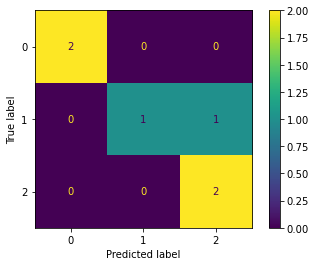

In [ ]:
# Example: confusion matrix demonstration with dummy data

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Dummy true labels and predictions
y_ground_truth = np.array([0, 1, 2, 2, 1, 0])
y_predictions = np.array([0, 2, 2, 2, 1, 0])

# Compute confusion matrix
cm_example = confusion_matrix(y_ground_truth, y_predictions)

# Plot Confusion Matrix
cm_plot = ConfusionMatrixDisplay(confusion_matrix=cm_example)
cm_plot.plot()

----
## 3. Runtime Performance

- How long did it take to run predictions for your validation set?
- What about your performance on the test set?
- What impact does the value of $k$ have on this?
- Does the best value of $k$ for your validation set hold true for the test set? Why or Why not?

*You can measure time using the following example code:*
 start_time = time.time()
 preds = knn_predictor(...)
 end_time = time.time()

---
## Additional Analysis
If you want to conduct any additional exploration, you can report it here.

---
Use additional cells if you need more space or want to add extra visualizations.

---
# Part 2: K-Means Clustering (25 points)

### Cheesecake Consumers Dilemma

In this assignment, you will analyze a dataset of customers visiting a cheesecake shop.

Your goals are to:

- Explore the dataset and determine which features you believe are meaningful for clustering
- Experiment with different values of $k$
- Implement K-Means clustering from scratch
- Interpret your results

**Note:** You may use NumPy, Pandas, and Matplotlib. You may not use scikit-learn's `KMeans` for your own implementation. Any provided code can be modified, it is just there to guide you or offer additional insight to the directions.


### Load and Inspect the Data

Load the dataset and explore its structure.


In [ ]:
import pandas as pd

# Load the CSV file

try:
  df = pd.read_csv("CheesecakeConsumers.csv")
except:
  df = pd.read_csv("/content/drive/MyDrive/CheesecakeConsumers.csv")
# Conduct any other exploration to determine how to best create a feature space for clustering
# Such as selecting numeric features and applying any normalization techniques on them if needed
# Example:
# X = df[["Age", "Consumer Score"]].values

## K-Means Implementation

Implement K-Means clustering from scratch below.



In [ ]:
# TODO: Implement your K-Means algorithm

# Example structure:
# def kmeans(features, k, max_iters=20): #Remember we don't want an infinite loop so we'll end the algorithm after max_iters
#     # Initialize centroids
#     # Repeat until convergence:
#         # Assign labels
#         # Update centroids
#     return labels, centroids


In [ ]:

### If you wish to test your implementation prior to interacting with real data
### Feel free to use the following code stub to see if you can cluster the following dummy data

# X_test = np.vstack([ np.random.normal(loc=0.0, scale=0.5, size=(10, 2)),
#     np.random.normal(loc=5.0, scale=0.5, size=(10, 2))])

# plt.scatter(X_test[:,0], X_test[:,1], s=50)
# plt.title("Dummy Data 2 Clusters")
# plt.show()


## Run Your K-Means

Run your implementation with your chosen k on the cheesecake consumer data, feel free to try multiple runs and determine what k best clusters this data.

Defend your best k value after deciding on one, you should use visual aids like scatterplots to make your point.

In [ ]:
#  Run your K-Means
# labels, centroids = kmeans(X_scaled, k=...)

In [ ]:
# Plot your clusters, and centroids. Finalize your best value for k

In [ ]:
## Feel free to use some of the following stub to assist you in plotting it

# plt.scatter(..., c=labels, cmap="viridis")
## Also plot your centroids on this plot for visual clarity
# plt.xlabel("Spending power")
# plt.ylabel("Age")
# plt.title("K-Means Clusters")
# plt.show()


## Testing New Data

Below are 5 new customers alongside their data attributes:

| ID | Age | Gender | Spending Power| Consumer Score (1–100) |
|----|-----|--------|---------------|------------------------|
| 1  | 24  | Female | 25            | 85                     |
| 2  | 52  | Male   | 80            | 20                     |
| 3  | 35  | Female | 55            | 60                     |
| 4  | 42  | Male   | 45            | 30                     |
| 5  | 29  | Female | 90            | 75                     |

**Tasks:**
1. Standardize these 5 samples the same way you processed your original data.
2. Assign each sample to the closest cluster centroid (from your implementation).
3. Plot these points on top of your clustered data, using distinct markers or colors.


*State your reasoning for finalizing on this value of k*

## Analysis and Reflection

Answer the following questions:

1. What patterns or groups do you notice in your clusters?
2. Does the value of max iterations pay a large role in your algorithm? Try various values to showcase your answer.
3. Why might K-Means struggle to perfectly separate customers?
4. If you had more features, what other data would you collect?



*Write answers here*

## Comparison with scikit-learn KMeans

To review your own implementation we will:

- Use scikit-learn's KMeans to cluster the original cheesecake consumers data (Not the testing samples).
- Compare scikit-learn's centroids and labels to your own implementation.
- Reflect on similarities or differences.

**Note:** This is to help you evaluate your implementation, it does not affect your grade if results are not identical.


In [ ]:
# TODO: Fit scikit-learn KMeans for comparison

from sklearn.cluster import KMeans

# Fit KMeans
# kmeans_sklearn = KMeans(n_clusters=..., random_state=0)
# kmeans_sklearn.fit(standardized_x)

# Get labels and centroids
# sklearn_labels = kmeans_sklearn.labels_
# sklearn_clusters = kmeans_sklearn.cluster_centers_


NameError: name 'standardized_x' is not defined

In [ ]:
# TODO: Plot scikit-learn clusters

import matplotlib.pyplot as plt

# plt.scatter(x_feature_1, x_feature_2, sklearn_labels, cmap='viridis', s=50)
# plt.xlabel("Standardized Feature 1 Name")
# plt.ylabel("Standardized Feature 2 Name")
# plt.title("scikit-learn KMeans Clusters")
# plt.show()


## Reflection on Comparison

Answer the following:

- How similar are the clusters to your implementation?
- Did scikit-learn converge to the same or different centroids?
*Write your reflection below.*
